# ![](CoronavirusAnimation2.gif)

In [368]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from datetime import date, timedelta
from sklearn.cluster import KMeans
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import datetime

In [369]:
import folium
import pandas as pd
import numpy as np
df = pd.read_csv('covid-19-DistrictWiseCaseMap.csv')
# print(df)
m = folium.Map(
    tiles='OpenStreetMap',
    location=[24.25135,89.91671],
    zoom_start=7,
    zoom_control=True,
    scrollWheelZoom=False
)
for index,rows in df.iterrows():
    if rows['lat'] and rows['lon']:
        folium.Marker([rows['lat'], rows['lon']], tooltip=rows['District']+" - "+str(rows['Cases'])).add_to(m)
folium.LayerControl().add_to(m)
m

***We already know Covid-19 has become an international pandemic. The scenario of our country is good at all too. As we can see among 64 districts most of the districts are affected with Corona virus. If we still don’t take this thing into care the situation might get out of hand.***

***Bangladesh Covid-19 Case Summary Representation***

In [370]:
dataFromCsv = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv')
totalCaseNumber = dataFromCsv['Case'].sum()
totalDeathNumber = dataFromCsv['Death'].sum()
totalRecoveredNumber = dataFromCsv['Recovered'].sum()
totalPatientNumber = totalCaseNumber - (totalDeathNumber+totalRecoveredNumber)

slices = [totalPatientNumber,totalDeathNumber,totalRecoveredNumber]
activities = ['Patient','Death','Recovered']

dataFrame = {
    "slices" : slices,
    "activities" : activities
}
dataset = pd.DataFrame(dataFrame)
fig = px.pie(dataset,
             values="slices",
             names="activities",
             template="presentation",
             labels = {'slices' : 'No Cases', 'activities' : 'Status'},
             color_discrete_sequence=['#4169E1', '#DC143C', '#006400'],
             width=800,
             height=450,
             hole=0.6,
             title="Covid-19 Case Summary BD")
fig.update_traces(rotation=110, pull=0.05, textinfo="percent+label")
py.offline.iplot(fig)

***The cases summary of our country is a matter of concern as well. As we can see the amount of Covid-19 cases still taking treatment is very high. People are not easily getting out of this corona virus.***

In [371]:
dataFromCsv = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv')
totalCaseNumber = int(dataFromCsv['Case'].iloc[-1])
totalDeathNumber = int(dataFromCsv['Death'].iloc[-1])
totalRecoveredNumber = int(dataFromCsv['Recovered'].iloc[-1])
totalPatientNumber = totalCaseNumber - (totalDeathNumber+totalRecoveredNumber)

slices = [totalPatientNumber,totalDeathNumber,totalRecoveredNumber]
activities = ['Patient','Death','Recovered']

dataFrame = {
    "slices" : slices,
    "activities" : activities
}
dataset = pd.DataFrame(dataFrame)
fig = px.pie(dataset,
             values="slices",
             names="activities",
             template="presentation",
             labels = {'slices' : 'No Cases', 'activities' : 'Status'},
             color_discrete_sequence=['#4169E1', '#006400', '#DC143C'],
             width=800,
             height=450,
             hole=0.6,
             title="Covid-19 Case Summary 24 Hours")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

***The scenario hasn’t changed in the last 24 hours. But a little good news is recovery number is higher than the number of death cases today.***

In [372]:
dataFromCsv = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv')
totalDeathNumber = dataFromCsv['Death'].sum()
totalRecoveredNumber = dataFromCsv['Recovered'].sum()

slices = [totalDeathNumber,totalRecoveredNumber]
activities = ['Death','Recovered']

dataFrame = {
    "slices" : slices,
    "activities" : activities
}
dataset = pd.DataFrame(dataFrame)
fig = px.pie(dataset,
             values="slices",
             names="activities",
             template="presentation",
             labels = {'slices' : 'No Cases', 'activities' : 'Status'},
             color_discrete_sequence=['#DC143C', '#006400'],
             width=800,
             height=450,
             hole=0,
             title="Death VS Recovered Ratio")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
py.offline.iplot(fig)

***A very serious issue of concern is our death rate against recovery rate. As we can see our death rate is higher than the recovery rate. This scenario is rare in most of the corona affected countries.***

In [373]:
# dataFromCsv = pd.read_csv('../Analysis Data/covid-19-PerDayCaseSummaryBD.csv')
dataFromCsv = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataFromCsv = dataFromCsv.cumsum()
dataFromCsv = dataFromCsv.reset_index()
# print(dataset)
# print(dataFromCsv)
datetimeobject = datetime.datetime.strptime(str(dataFromCsv['Date'].iloc[1]),'%Y-%m-%d %H:%M:%S')
startDate = datetimeobject.strftime('%d-%b-%Y')
datetimeobject = datetime.datetime.strptime(str(dataFromCsv['Date'].iloc[-1]),'%Y-%m-%d %H:%M:%S')
endDate = datetimeobject.strftime('%d-%b-%Y')
xlabel = str(str(startDate) + ' UPTO ' + str(endDate))
# print(xlabel)
fig = px.area(dataFromCsv, x="Date", y="Case", 
              template="presentation", 
              labels = {'Date': xlabel, 'Case': 'Positive Cases'},
              title='Postive Case Trend',
              color_discrete_sequence=['#4169E1'])
fig2 = px.area(dataFromCsv, x="Date", y="Death", 
               template="presentation",
               labels = {'Date': xlabel, 'Death': 'Death Cases'},
               title='Death Case Trend',
               color_discrete_sequence=['#DC143C'])

fig3 = px.area(dataFromCsv, x="Date", y="Recovered", 
               template="presentation",
               labels = {'Date': xlabel, 'Recovered': 'Recovered Cases'},
               title='Recovered Case Trend',
               color_discrete_sequence=['#FF7F50'])
# for i in fig.patches:
#     print(i)
fig.update_traces(textposition='top left',mode='lines+markers')
# fig.update_layout(annotations = [dict(text = str(dataFromCsv['Case'].iloc[-1]),x=10000,y=800)])
fig2.update_traces(textposition='top left',mode='lines+markers')
fig3.update_traces(textposition='top left',mode='lines+markers')
fig.show()
fig2.show()
fig3.show()

***Form 8th March 2020 when first covid-19 case was found up until 5th April 2020 our trend graph was pretty parallel. But from then the curve starts to get up exponentially until now. <br>Today we have encountered 549 positive cases. Which makes the total Covid-19 positive cases to 6462. Today we lost 3 souls which makes the total to 155. Most importantly 8 persons recovered from this corona virus which makes 138 fully cured patients.***

In [374]:
import plotly.graph_objects as go
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"])
dataset = dataset.reset_index()
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='Positove', x=dataset['Date'], y=dataset['Case'], marker_color = '#4169E1'),
    go.Bar(name='Death', x=dataset['Date'], y=dataset['Death'], marker_color = '#DC143C'),
    go.Bar(name='Recovered', x=dataset['Date'], y=dataset['Recovered'], marker_color = '#006400')
])
# Change the bar mode
fig.update_layout(barmode='stack',template="presentation",title_text='Per Day Case Summary')
fig.show()

***As we can see from the graph we have broken our previous record. Today the number of positive cases found is the highest. Today 549 positive cases are found.<br>
The most amount of patients recovered was on 23rd April. After that the recovered amount is very low.***

In [375]:
CoronaTestCaseNo = pd.read_csv('covid-19-TestResultsBD.csv')
# print(CoronaTestCaseNo)

postitiveCases = int(CoronaTestCaseNo['Total'].iloc[3])
negativeCases = int(CoronaTestCaseNo['Total'].iloc[1]) - postitiveCases
otherCases = int(CoronaTestCaseNo['OLab'].iloc[1])
slices = [postitiveCases,negativeCases]
activities = ['Covid-19 Positive','Covid-19 Negative']
cols = ['#DC143C','#4169E1']
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Test Results", "Test Results 24 Hour"),
    specs=[[{"type": "domain"}, {"type": "domain"}]]
)
fig.add_trace(
    go.Pie(labels = activities,
           values=slices,
           marker_colors=cols,pull=0.05,textinfo="percent+label"),
           row=1, col=1)

postitiveCases = int(CoronaTestCaseNo['Total'].iloc[2])
negativeCases = int(CoronaTestCaseNo['Total'].iloc[0]) - postitiveCases
otherCases = int(CoronaTestCaseNo['OLab'].iloc[1])
slices = [postitiveCases,negativeCases]
activities = ['Covid-19 Positive','Covid-19 Negative']
cols = ['#DC143C','#4169E1']

fig.add_trace(
    go.Pie(labels = activities,
           values=slices,
           marker_colors=cols,pull=0.05,textinfo="percent+label"),
           row=1, col=2)
fig.update_traces(rotation = 180,hole=0, hoverinfo="label+percent+value",textfont_size=13)
fig.update_layout(height=500, showlegend=True, template="presentation")

fig.show()

***We can see that among 54733 tests we have found 6462 Covid-19 positive cases and 48271 cases found negative. Which is close to 90%. Our average positive rate is 11.8% which means among 100 tests we are getting approximately 12 positive patients.<br>Today the positive cases ratio is close to the average.***

In [376]:
dataFromCsv = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv')
dataFromCsv = dataFromCsv[1:]
# print(dataFromCsv)
positiveRatio = round((dataFromCsv['Case'] / dataFromCsv['Tested'])*100,2)

positiveRatioDF = pd.Series(positiveRatio,name="Ratio")
datavsratio = pd.concat([dataFromCsv['Date'],positiveRatioDF], axis=1)

fig = px.bar(datavsratio, x='Date', y='Ratio',
             hover_data=['Date', 'Ratio'],
             color='Ratio',
             color_continuous_scale= "Reds",
             labels={'Ratio' : 'Positive Case Ratio(%)'},
             template="ggplot2",
             height = 600,
             title='Tests Vs Positove Cases Ratio Per Day')
fig.show()

***This graph shows the percentage of the positive Covid-19 cases against the total tests made each day. At 20th April 2020 the ratio was the highest. That day 2779 tests were made and among them more than 17% (492) were found Covid-19 positive.***

In [377]:
CoronaTestCaseNo = pd.read_csv('covid-19-TestResultsBD.csv')
# print(CoronaTestCaseNo)

iedrcCases = int(CoronaTestCaseNo['Lab'].iloc[1])
otherCases = int(CoronaTestCaseNo['OLab'].iloc[1])
slices = [iedrcCases,otherCases]
activities = ['In IEDCR','In Other Labs']
cols = ['#FF6347','#000080']
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Tests Conducted Total", "Tests Conducted 24 Hour"),
    specs=[[{"type": "domain"}, {"type": "domain"}]]
)
fig.add_trace(
    go.Pie(labels = activities,
           values=slices,
           marker_colors=['#FF6347','#000080'],pull=0.05, textinfo="percent+label"),
           row=1, col=1)

iedrcCases = int(CoronaTestCaseNo['Lab'].iloc[0])
otherCases = int(CoronaTestCaseNo['OLab'].iloc[0])
slices = [iedrcCases,otherCases]
activities = ['In IEDCR','In Other Labs']
cols = ['#FF6347','#000080']

fig.add_trace(
    go.Pie(labels = activities,
           values=slices,
           marker_colors=['#FF6347','#000080'],pull=0.05, textinfo="percent+label"),
           row=1, col=2)
fig.update_traces(hole=.4, hoverinfo="label+percent+value",textfont_size=15)
fig.update_layout(height=500, showlegend=True, template="presentation")

fig.show()

***At the beginning all the Covid-19 tests were made by IEDCR. But this testing facilities are now expanded to other Labs. Currently only 19% of the total tests are conducted by IEDCR***

In [378]:
caseBangladesh = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv')
result = caseBangladesh.sort_values(['Tested'], ascending= True)
fig = px.area(dataFromCsv, x="Tested", y="Case", 
              template="presentation", 
              labels = {'Tested': 'Total Test', 'Case': 'Positive Cases'},
              title='Tested Vs Positive Cases Trend',
              color_discrete_sequence=['#4169E1'])

fig.update_traces(textposition='top left',mode='lines+markers')
# fig.update_layout(annotations = [dict(text = str(dataFromCsv['Case'].iloc[-1]),x=10000,y=800)])
fig.show()

In [379]:
caseBangladesh = pd.read_csv('covid-19-DivisionWiseCase.csv')
# print(caseBangladesh)
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "table"}, {"type": "domain"}]]
)
# values=[caseBangladesh[k].tolist() for k in caseBangladesh.columns[1:]],
fig.add_trace(
    go.Table(
        header=dict(
            values=[str(caseBangladesh.columns[0]),str(caseBangladesh.columns[1])],
            font=dict(size=15),
            align="center"
        ),
        cells=dict(
            values=[caseBangladesh[k].tolist() for k in caseBangladesh.columns[0:]],
            align = "center")
    ),
    row=1, col=1
)

slices=caseBangladesh['Cases'].tolist()
activities=caseBangladesh['Division'].tolist()
# print(slices)
# print(activities)
fig.add_trace(
    go.Pie(labels = activities,
           values=slices,pull=0.05,hole=.5,textinfo="percent", rotation=180),
           row=1, col=2)
# fig.update_traces(rotation = 180,hole=0.5, hoverinfo="label+percent+value",textfont_size=13)
fig.update_layout(height=500, 
                  showlegend=True, 
                  template="presentation",
                  title_text="Division Wise Covid-19 Cases")
fig.show()



***As we can see from the table Dhaka is mostly affected than any other divisions. The main international airport is located in this capital city. Which results in the most amount of people coming from abroad here who brought he virus here. As a result the Covid-19 cases is the highest in Dhaka City. Which is 84%. The port city Chattogram comes second in the list.***

In [380]:
caseBangladesh = pd.read_csv('covid-19-DhakaCityArea.csv')
caseBangladesh
result = caseBangladesh.sort_values(['Number'], ascending= True)
# print(result)
numberOfCases = result[-20:]
fig = px.bar(numberOfCases, x='Area', y='Number',
             hover_data=['Area', 'Number'],
             labels={'Area' : 'Affected Area', 'Number' : 'Number of Cases' },
             template="xgridoff",
             text='Number',
             title="Dhaka City Area Wise Covid-19 Cases(Top 20)",
             height = 600)
fig.show()
# numberOfCases

***In the graph we can see the 20 mostly affected areas of Dhaka city. Here the situation of Rajarbagh is pretty bad compared with the other areas. There 119 positive corona patients are found. Other areas are ranging between 30 to 70. Each day the number is increasing and new areas are getting affected.***

In [381]:
caseBangladesh = pd.read_csv('covid-19-DhakaCityArea.csv')
caseBangladesh
result = caseBangladesh.sort_values(['Number'], ascending= True)
numberOfCases = result[0:20]
fig = px.bar(numberOfCases, x='Area', y='Number',
             hover_data=['Area', 'Number'],
             labels={'Area' : 'Affected Area', 'Number' : 'Number of Cases' },
             template="xgridoff",
             text='Number',
             title="Dhaka City Area Wise Covid-19 Cases(Bottom 20)",
             range_y=[0,10],
             height = 600)
fig.show()

***Situations are pretty much under control among these areas. Here the people are strictly following the rules of quarantine and they kept the number of positive cases to 1***

In [382]:
caseBangladesh = pd.read_csv('covid-19-DistrictWiseCase.csv')
dhaka=caseBangladesh[caseBangladesh['Division']=='Dhaka']
fig = px.treemap(dhaka, path=['Division', 'District', 'Cases'], values='Cases',
                  color='Cases', hover_data=['District'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(dhaka['Cases'], weights=dhaka['Cases']))
fig.update_layout(height=500, 
                  showlegend=True, 
                  template="presentation",
                  title_text="Dhaka Division Covid-19 Cases")
fig.show()


In [383]:
caseBangladesh = pd.read_csv('covid-19-DistrictWiseCase.csv')
Chattogram=caseBangladesh[caseBangladesh['Division']=='Chattogram']
fig = px.treemap(Chattogram, path=['Division', 'District', 'Cases'], values='Cases',
                  color='Cases', hover_data=['District'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(Chattogram['Cases'], weights=Chattogram['Cases']))
fig.update_layout(height=500, 
                  showlegend=True, 
                  template="presentation",
                  title_text="Chattogram Division Covid-19 Cases")
fig.show()

In [384]:

gender = pd.read_csv('covid-19-GenderWiseCase.csv')

fig = px.pie(gender, values='percentage', names='gender',hole=.5,color_discrete_sequence=px.colors.sequential.RdBu,)
fig.update_layout(
    title={
        'text': "Gender Wise Covid-19 Cases",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()



In [385]:
gender = pd.read_csv('covid-19-AgeWiseCase.csv')

fig = px.pie(gender, values='percentage', names='age_range',hole=.5,color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    title={
        'text': "Age Wise Covid-19 Cases",
        'y':1,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [386]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
# symptoms

In [387]:
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             y="percentage", x="symptom", color='symptom', 
             log_y=True, template='ggplot2', title='Symptom of  Coronavirus')
fig.show()

In [388]:
fig = px.pie(symptoms,
             values="percentage",
             names="symptom",
             template="ggplot2")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label",)
fig.update_layout(
    title={
        'text': "Symptom of  Coronavirus",
        'y':.99,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**Linear Regression (Tested vs Case)**

[348.11410929 116.39012952 235.47408798 131.3400637   -4.62701007
  -8.75112985 112.91040347 272.20452971  56.07487784  37.25858137
  -7.97785739]


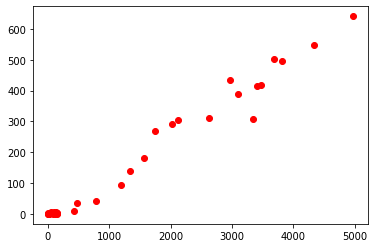

In [389]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv', parse_dates = ['Date'])
dataset
testVSCase = dataset[['Tested','Case']].sort_values('Tested')
test = testVSCase.iloc[:,:-1].values
# print(test)
case = testVSCase.iloc[:,1].values
# print(case)

from sklearn.model_selection import train_test_split

test_train,test_test, case_train, case_test = train_test_split(test,case, test_size = 0.2, random_state = 0)
# print(test_train)
# print(case_train)
# print(test_test)
# print(case_test)
plt.scatter(test_train,case_train, color='red')

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(test_train,case_train)
case_pred = regressor.predict(test_test)
print(case_pred)

***MLPRegression Model (Time Series Vs All)***

In [390]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataset
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
accumulated_count = dataset.cumsum()
x = np.arange(len(dataset)).reshape(-1, 1)
# print(X)
y = dataset.values
# print(y)
# data = data[22:]

from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=[32, 32, 10], max_iter=50000, alpha=0.0005, random_state=26)
regressor.fit(x, y)


test = np.arange(len(dataset)+7).reshape(-1, 1)
pred = regressor.predict(test)
prediction = pred.round().astype(int)
# print(prediction)
import datetime as datetime
import dateutil.parser
week = [dataset.index[0] + timedelta(days=i) for i in range(len(prediction))]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(dt_idx,name="Date")
# print(predicted_count)
dataFrmae = pd.DataFrame(prediction, columns = ['Case','Day','Death','Recovered','Tested'])

prediction_value = pd.concat([dataFrmae,predicted_count], axis=1)
prediction_value = prediction_value.drop(['Day'], axis=1)
prediction_value.set_index('Date',inplace = True)
accumulated_count = accumulated_count.drop(['Day'], axis=1)
prediction_value.index = pd.to_datetime(prediction_value.index)

# accumulated_count.plot()
# prediction_value.plot()

updateDateTime = datetime.datetime.now().strftime('%Y-%m-%d')
prediction_value = prediction_value[prediction_value.index >= dateutil.parser.parse(updateDateTime)]
#print(prediction_value)
# plt.title('Prediction of Accumulated Confirmed Count')
# plt.legend(['current confirmd count', 'predicted confirmed count'])
# plt.show()


fig = go.Figure(data=[go.Table(
    header=dict(values=['Date','Case','Death','Recovered'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[prediction_value.index,prediction_value.Case,prediction_value.Death, prediction_value.Recovered, prediction_value.Tested],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(
    title={
        'text': "Next 7 days Predictions",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [391]:

fig = go.Figure(go.Bar(x=prediction_value.index, y=prediction_value.Tested, name='Test Cases'))
fig.add_trace(go.Bar(x=prediction_value.index, y=prediction_value.Case, name='Positive Cases'))


fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_layout(
    title={
        'text': "Next 7 days Predictions Total- (Test Cases vs Positive Cases)",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [392]:
fig = go.Figure(go.Bar(x=prediction_value.index, y=prediction_value.Recovered, name='Recovery Cases'))
fig.add_trace(go.Bar(x=prediction_value.index, y=prediction_value.Death, name='Death Cases'))


fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_layout(
    title={
        'text': "Next 7 days Predictions Total-(Recovery Cases vs Death Cases)",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

***ARIMA Algorithm***

In [393]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataset
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
accumulated_count = dataset.cumsum()
model_case = ARIMA(dataset['Case'].values, order=(1, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_case = forcast_case[0].tolist()
pred_case = [round(num) for num in pred_case]

In [394]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
dataset
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
# print(dataset['Death'].values)
model_case = ARIMA(dataset['Death'].values, order=(1, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_death = forcast_case[0].tolist()
pred_death = [round(num) for num in pred_death]

In [395]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
# print(dataset.columns)
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
# print(dataset['Recovered'].values)
model_case = ARIMA(dataset['Recovered'].values, order=(2, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_Recovered = forcast_case[0].tolist()
pred_Recovered = [round(num) for num in pred_Recovered]

In [396]:
dataset = pd.read_csv('covid-19-PerDayCaseSummaryBD.csv',parse_dates=["Date"], index_col='Date')
# print(dataset.columns)
dataset = dataset.resample('D').first().fillna(0).cumsum()
dataset = dataset[22:]
# dataset = dataset.reset_index()
model_case = ARIMA(dataset['Tested'].values, order=(2, 2, 1))
fit_model_case = model_case.fit(trend='c', full_output=True, disp=True)
fit_model_case.summary()
forcast_case = fit_model_case.forecast(steps=7)
pred_test = forcast_case[0].tolist()
pred_test = [round(num) for num in pred_test]
# pd.DataFrame(pred_test)

In [397]:
data = {
    "Case" : pred_case,
    "Death" : pred_death,
    "Recovered": pred_Recovered,
    "Tested" : pred_test
}
dataFrame = pd.DataFrame(data)
# print(dataFrame)
week = [dataset.index[dataset.shape[0]-1] + timedelta(days=i) for i in range(1,8)]
dt_idx = pd.DatetimeIndex(week)
predicted_count = pd.Series(dt_idx,name="Date")
prediction_value = pd.concat([dataFrame,predicted_count], axis=1)
prediction_value.set_index('Date',inplace = True)
#print(prediction_value)
fig = go.Figure(data=[go.Table(
    header=dict(values=['Date','Case','Death','Recovered'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[prediction_value.index,prediction_value.Case,prediction_value.Death, prediction_value.Recovered, prediction_value.Tested],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(
    title={
        'text': "Next 7 days Predictions",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [398]:

fig = go.Figure(go.Bar(x=prediction_value.index, y=prediction_value.Tested, name='Test Cases'))
fig.add_trace(go.Bar(x=prediction_value.index, y=prediction_value.Case, name='Positive Cases'))


fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_layout(
    title={
        'text': "Next 7 days Predictions Total- (Test Cases vs Positive Cases)",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [399]:
fig = go.Figure(go.Bar(x=prediction_value.index, y=prediction_value.Recovered, name='Recovery Cases'))
fig.add_trace(go.Bar(x=prediction_value.index, y=prediction_value.Death, name='Death Cases'))


fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.update_layout(
    title={
        'text': "Next 7 days Predictions Total-(Recovery Cases vs Death Cases)",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

**bayesian ridge polynomial regression**

In [400]:
df_tc=pd.read_csv('testCase.csv') 
bd_cases = []
bd_tested=[]
bd_dayno=[]

for rate in df_tc.case:
    bd_cases.append(rate) #extracting confirm cases as an array

for rate in df_tc.tested:
    bd_tested.append(rate) #extracting conducted  as an array

for rate in df_tc.day:
    bd_dayno.append(rate) #extracting conducted  as an array
    
    
bd_cases=bd_cases[20:]
bd_tested=bd_tested[20:]
bd_dayno=bd_dayno[20:]

bd_tested_np=np.array(bd_tested).reshape(-1,1) #converting array as numpy array 

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(bd_tested_np, bd_cases, test_size=0.20, shuffle=False)
cases_in_future = 5
#future_forcast = np.array([bd_tested.append(bd_tested[-1]+100) for i in range(days_in_future)]).reshape(-1, 1)
future_forcast=bd_tested
# future_forcast.append(3600)
for i in range(cases_in_future):
    future_forcast.append(int(future_forcast[-1])+100)
    
future_forcast=np.array(future_forcast).reshape(-1,1)

bayesian_poly = PolynomialFeatures(degree=1)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)
type(bayesian_poly_X_test_confirmed)

# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=2)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)

future_case=[float(v) for v in bayesian_pred]

future_forcast=future_forcast.tolist()
data = {
    "Test_Cases" : future_forcast[-5:],
    "Positive_Cases" : future_case[-5:],
    
}
dataFrame = pd.DataFrame(data)
dataFrame.Positive_Cases=dataFrame.Positive_Cases.astype(int)
fig = go.Figure(data=[go.Table(
    header=dict(values=["If tomorrow's conducted test no",'Positive Case will be'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dataFrame.Test_Cases,dataFrame.Positive_Cases],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(
    title={
        'text': "Tomorrow's Positive Case Predictions Against Test Cases",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.3s finished


**LinearRegression-Polynomial**

In [401]:
poly = PolynomialFeatures(degree=1)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)
bd_cases=np.array(bd_cases).reshape(-1, 1)
poly_bd_confirmed = poly.fit_transform(bd_cases)

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

future_case=[float(v) for v in linear_pred]

# future_forcast=future_forcast.tolist()
data = {
    "Test_Cases" : future_forcast[-5:],
    "Positive_Cases" : future_case[-5:],
    
}
dataFrame = pd.DataFrame(data)
dataFrame.Positive_Cases=dataFrame.Positive_Cases.astype(int)

fig = go.Figure(data=[go.Table(
    header=dict(values=["If tomorrow's conducted test no",'Positive Case will be'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[dataFrame.Test_Cases,dataFrame.Positive_Cases],
               fill_color='lavender',
               align='left'))
])
fig.update_layout(
    title={
        'text': "Tomorrow's Positive Case Predictions Against Test Cases",
        'y':.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()
